In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [ ]:
#第一个拿到的数据集
data = pd.read_csv('bike.csv')
data.head()


In [14]:
type(data.time[0])

str

In [ ]:
data2 = pd.read_csv('/Users/valarian/Downloads/单车数据/曲阜数据/6-13/qufu_613_utc.csv', \
                    names = ['bid', 'lat', 'lng', 'time'], usecols = [0, 2, 3, 4])
data2.head()

In [18]:
d = pd.Series([int(x.split('-')[-1].split(' ')[0]) for x in data2.time])
data2['day'] = d


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline
city_map = gpd.read_file('/Users/valarian/SJTU/SJTU/Data/shanghaitown/shanghaitown.shp')
geometry = [Point(xy) for xy in zip(data2.lng, data2.lat)]
geo_df = gpd.GeoDataFrame(data2, geometry = geometry)
#fig, ax = plt.subplots(10,3,figsize = (15,60))
days = set(geo_df['day'])
for i in days:
    fig, ax = plt.subplots(1,1,figsize = (2,2))
    city_map.plot(ax = ax, alpha = 0.4)#, alpha = 0.4, color = 'grey')
    geo_df[geo_df['day'] == i].plot(ax =ax, markersize = 0.2)
    ax.set_title('day of month '+str(i))


# city_map.plot(ax = ax[i], alpha = 0.4)#, alpha = 0.4, color = 'grey')
# geo_df[geo_df['hour'] == i].plot(ax =ax[i], markersize = 0.2)
# ax[i].set_title(i+1)
plt.savefig('eachday.png')
plt.legend(prop={'size':15})

In [35]:
single = data[data.car_id == 216787333].sort_values(by = 'createdAt')
single

,id,unique_id,car_id,bike_type,time,lat,lng,center,distance,createdAt,updatedAt
1,171060,0216787333_3123060_12133998,216787333,1,2017-08-12 16:15:42.647204+08,31.230604,121.339990,0101000020E6100000F7DC1F65C2555E40830FACD8083B...,55,2017-08-12 13:46:13.251187+08,2017-08-12 16:15:42.647204+08
367890,1587650,0216787333_3123069_12133997,216787333,1,2017-08-12 15:58:08.865352+08,31.230697,121.339972,0101000020E6100000EBAB7D19C2555E40496219F10E3B...,56,2017-08-12 15:30:25.468982+08,2017-08-12 15:58:08.865352+08
953233,5647440,0216787333_3123061_12133971,216787333,1,2017-08-13 01:34:42.023951+08,31.230618,121.339710,0101000020E61000006FA049D0BD555E40AC4894CB093B...,81,2017-08-12 21:29:16.136673+08,2017-08-13 01:34:42.023951+08


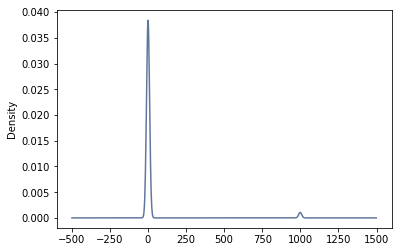

In [14]:
data.bike_type.plot(kind = 'kde')

In [ ]:
import random

from pyecharts import options as opts
from pyecharts.charts import HeatMap
from pyecharts.render import make_snapshot

def heatmap_base() -> HeatMap:
    value = [[i, j, random.randint(0, 50)] for i in range(24) for j in range(7)]
    print(value)
    c = (
        HeatMap()
        .add_xaxis(list(range(24)))
        .add_yaxis("series0", list(range(7)), value)
        .set_global_opts(
            title_opts=opts.TitleOpts(title="HeatMap-基本示例"),
            visualmap_opts=opts.VisualMapOpts(),
        )
    )
    return c
graph = heatmap_base()
graph.render_notebook()
make_snapshot(graph.render(), 'graph.png', browser = 'Safari')

In [ ]:
# coding=utf-8
import random

from example.commons import Collector, Faker
from pyecharts import options as opts
from pyecharts.charts import HeatMap, Page

C = Collector()


@C.funcs
def heatmap_base() -> HeatMap:
    value = [[i, j, random.randint(0, 50)] for i in range(24) for j in range(7)]
    c = (
        HeatMap()
        .add_xaxis(Faker.clock)
        .add_yaxis("series0", Faker.week, value)
        .set_global_opts(
            title_opts=opts.TitleOpts(title="HeatMap-基本示例"),
            visualmap_opts=opts.VisualMapOpts(),
        )
    )
    return c


Page().add(*[fn() for fn, _ in C.charts]).render()

In [ ]:
from pyecharts.charts import Bar
from pyecharts.render import make_snapshot

bar = (
    Bar()
    .add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
    .add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
)
bar.render_notebook()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
bike = pd.read_csv('/Users/valarian/SJTU/SJTU/毕业论文/Data/data/单车数据/曲阜数据/5-26 to 6-13/qufu_526_613_utc.csv',
                  names = ['bid', 'lat', 'lng', 'time'], usecols = [0, 2, 3, 4])
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424634 entries, 0 to 424633
Data columns (total 4 columns):
bid     424634 non-null int64
lat     424634 non-null float64
lng     424634 non-null float64
time    424634 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 13.0+ MB


In [50]:
point = bike[['bid','lat', 'lng']]
point.duplicated().sum()

0

In [53]:
bike.duplicated(['lat', 'lng','time']).sum()

18

In [ ]:
position = bike[bike.bid == 100089039].sort_values('time')[['lat', 'lng']]
position

In [47]:
position.duplicated().sum()

0

In [48]:
bike[bike.bid == 100089039].sort_values('time')

,bid,lat,lng,time
190875,100089039,35.586602,116.950519,2017-5-27 15:39:43
194841,100089039,35.586562,116.950562,2017-5-27 17:29:58
196477,100089039,35.586685,116.950531,2017-5-27 18:23:52
198508,100089039,35.586584,116.950351,2017-5-27 20:24:10
200817,100089039,35.586759,116.950491,2017-5-28 05:38:28
205161,100089039,35.590715,116.970106,2017-5-28 17:09:48
205829,100089039,35.590663,116.970117,2017-5-28 17:27:13
210376,100089039,35.590723,116.970088,2017-5-29 10:17:55
217252,100089039,35.590714,116.970037,2017-5-29 12:26:35
218873,100089039,35.590720,116.970071,2017-5-29 13:25:39


In [34]:
bike.groupby('bid').count().idxmax()

lat     100089039
lng     100089039
time    100089039
dtype: int64

In [ ]:
import pandas as pd
import tushare as ts
data = pd.get_hist_data('600848')
data = pd.DataFrame(data)
data.head()